## Project on Drug Classification

Todos:
- Do visualization and analysis to understand the dataset .
- Apply Random Forest.
- Plot AUC-ROC curve.

In [1]:
#import all the libraries

import pandas as pd
# warning remove
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,roc_curve, auc,roc_auc_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from joblib import dump, load

In [2]:
df = pd.read_csv("G:/Data science Course/Assignments/model_version_assignment/model_version_asnmngt/data/drug200.csv") # Reading csv file

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df1 = df.copy() 

In [5]:
# cheching if there is any missing values
df1.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

##### The dataset does not have any missing values.

### Data visualization and analysis

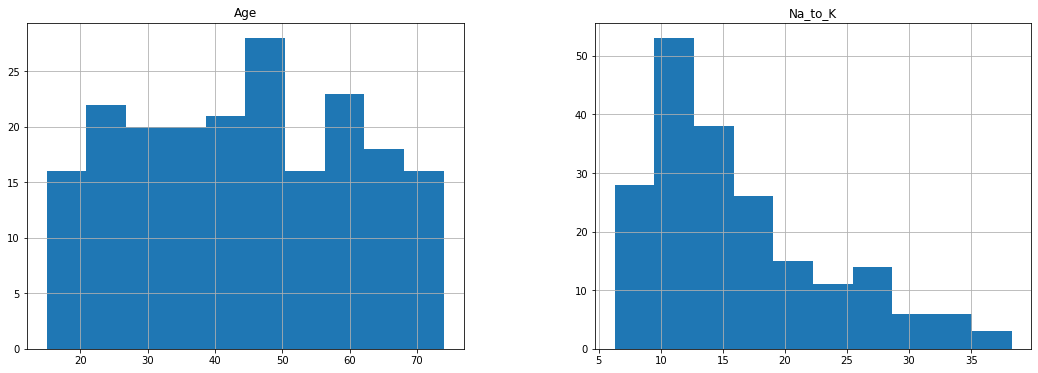

In [6]:
# histogram for each numerical type attributes
df1.hist(bins=10,figsize=(18,6));

##### From this two histogram we can come up with these decisions. First, Age is distributed and even though it is not properly normally distributed we can get some ideas about the frequencies of the age data. People who have the age range between 45 to 50 are the most in numbers. Second, the Na to Potassium Ration distribution is in right skewed manner.

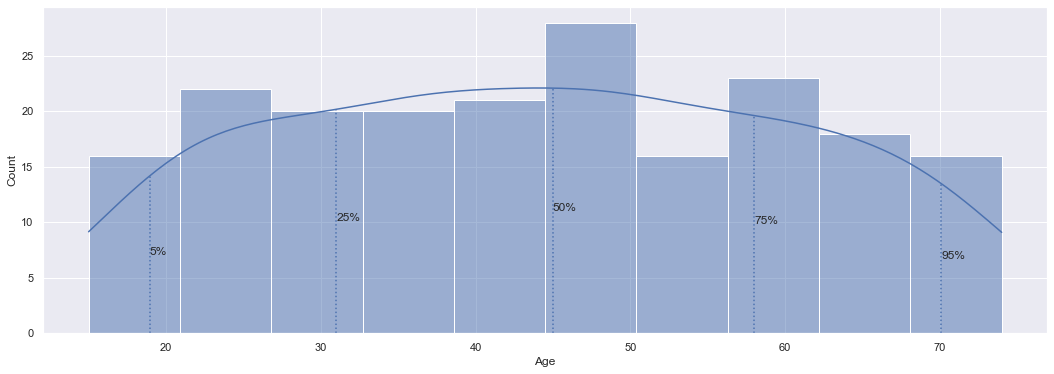

In [7]:
sns.set(rc = {'figure.figsize':(18, 6)})

ax = sns.histplot(x=df1['Age'], bins=10, kde=True)

quant_5, quant_25, quant_50, quant_75, quant_95 = df1['Age'].quantile(0.05), df1['Age'].quantile(0.25), df1['Age'].quantile(0.5), df1['Age'].quantile(0.75), df1['Age'].quantile(0.95)
quant_dict = {'5%': quant_5, '25%': quant_25, '50%': quant_50, '75%': quant_75, '95%': quant_95}

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

for key, value in quant_dict.items():
    height = np.interp(value, xs, ys)
    ax.vlines(value, 0, height,  ls=':')
    ax.text(value , height * 0.5, key, rotation=0)
    
plt.show()

##### Histogram of Age using kdeplot to show the continous curve based on these age information density. How the 'measure of dispersion' works is also shown from 5 quantile to 95 quantile.

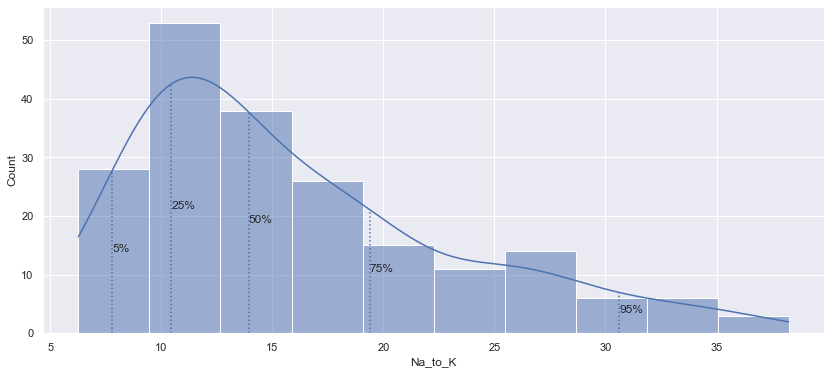

In [8]:
sns.set(rc = {'figure.figsize':(14, 6)})

ax = sns.histplot(x=df1['Na_to_K'],bins=10, kde=True)

quant_5, quant_25, quant_50, quant_75, quant_95 = df1['Na_to_K'].quantile(0.05), df1['Na_to_K'].quantile(0.25), df1['Na_to_K'].quantile(0.5), df1['Na_to_K'].quantile(0.75), df1['Na_to_K'].quantile(0.95)
quant_dict = {'5%': quant_5, '25%': quant_25, '50%': quant_50, '75%': quant_75, '95%': quant_95}

kdeline = ax.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

for key, value in quant_dict.items():
    height = np.interp(value, xs, ys)
    ax.vlines(value, 0, height,  ls=':')
    ax.text(value , height * 0.5, key, rotation=0)
    
plt.show()

##### Histogram of Na to Potassium Ration using kdeplot to show the continous curve based on these Na to Potassium Ration information density. How the 'measure of dispersion' works is also shown from 5 quantile to 95 quantile.

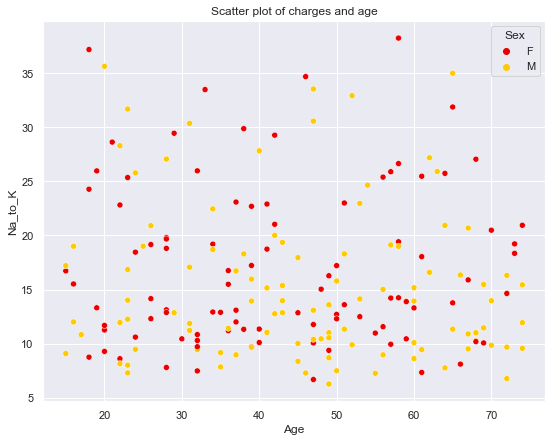

In [9]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x='Age',y='Na_to_K',data=df1,palette='hot',hue='Sex')
ax.set_title('Scatter plot of charges and age');

##### Above is the scatterplot to understand the relation between age and Na to Potassium Ration based on male and female patients.

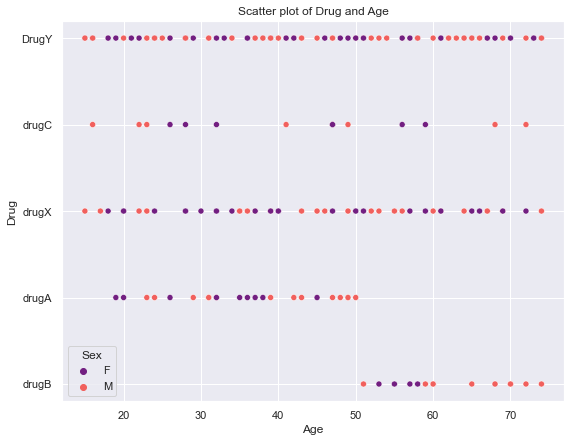

In [10]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x='Age',y='Drug',data=df1,palette='magma',hue='Sex')
ax.set_title('Scatter plot of Drug and Age');

##### Above is the scatterplot to understand the relation between age and Drug based on male and female patients.

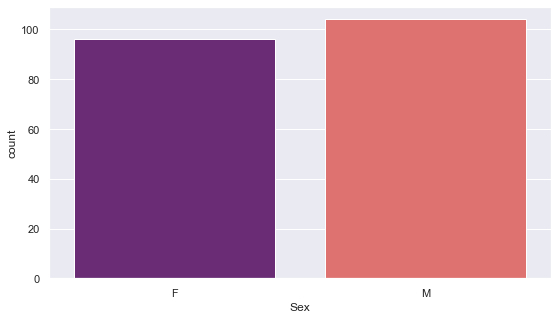

In [11]:
plt.figure(figsize=(9,5))
sns.countplot(x = df1.Sex,palette='magma')
plt.show()

##### In order to understand the distribution of male and female patients seaborns countplot is used on male and female patients.

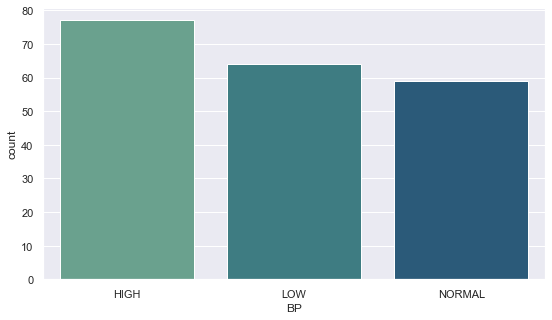

In [12]:
plt.figure(figsize=(9,5))
sns.countplot(x = df1.BP,palette="crest")
plt.show()

##### The above countplot helps us to understand the distribution of blood pressure of all the patients. We can see the distribution of 'High','Low' and 'Normal' blood pressure categories.

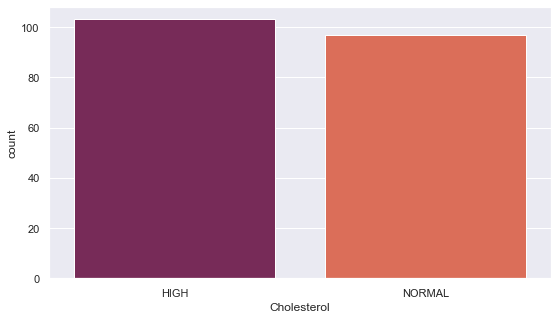

In [13]:
plt.figure(figsize=(9,5))
sns.countplot(x = df1.Cholesterol,palette="rocket")
plt.show()

##### The above countplot helps us to understand the distribution of Cholesterol of all the patients. We can see the distribution of 'High' and 'Normal' Cholesterol categories.

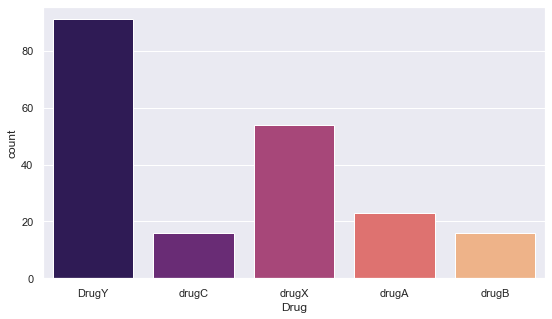

In [14]:
plt.figure(figsize=(9,5))
sns.countplot(x = df1.Drug,palette='magma')
plt.show()

##### The above countplot helps us to understand the distribution of Drug between all the patients. We can see the distribution of 'DrugY' is highest and 'drugC' is lowest.

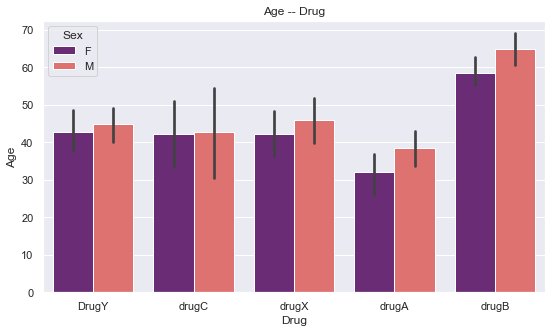

In [15]:
plt.figure(figsize = (9,5))
sns.barplot(data = df1,x = "Drug", y = "Age",palette='magma',hue='Sex')
plt.title("Age -- Drug")
plt.show()

##### The above barplot shows which type of drugs are distributed against the age of patient depending on their sex.

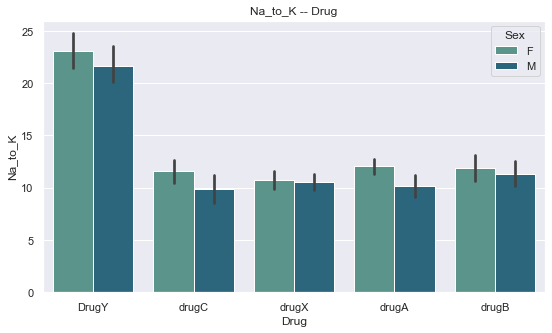

In [16]:
plt.figure(figsize = (9,5))
sns.barplot(data = df1,x = "Drug", y = "Na_to_K",palette='crest',hue='Sex')
plt.title("Na_to_K -- Drug")
plt.show()

##### The above barplot shows which type of drugs are distributed against  Na to Potassium Ration depending on their sex.

In [17]:
df_Sex_Drug = df1.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


##### According to sex how many drugs are distributed can be shown.

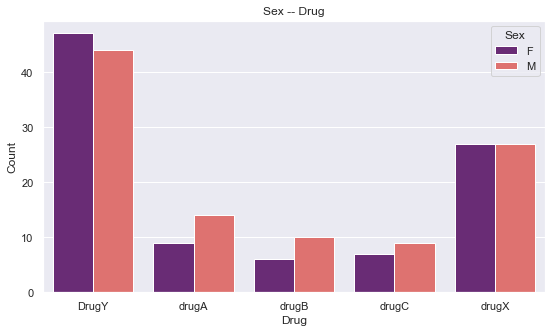

In [18]:
plt.figure(figsize = (9,5))
sns.barplot(data = df_Sex_Drug,x = "Drug",y="Count", hue = "Sex",palette='magma')
plt.title("Sex -- Drug")
plt.show()

##### From the above barplot we can see female people need more DrugY than male, although drugA,drugB and drugC has the inverse distribution. drugX is distributed equally amongst both male and female patients.

In [19]:
df_BP_Drug = df1.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


##### According to BP how many drugs are distributed can be shown.

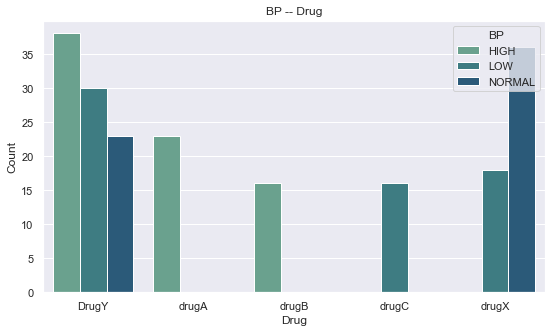

In [20]:
plt.figure(figsize = (9,5))
sns.barplot(data = df_BP_Drug,x = "Drug",y="Count", hue = "BP",palette='crest')
plt.title("BP -- Drug")
plt.show()

##### From the above barplot we can see that drugA and drugB is distributed amongst the patients who are suffering from high blood pressure. 
##### drugC is distributed amongst the patients who are suffering from normal blood pressure.
##### drugX is distributed amongst the patients who are suffering from both normal and low blood pressure although the distribution is higher for normal blood pressure. 
##### DrugY is distributed amongst the patients who are suffering from high,normal and low blood pressure. DrugY is mostly used for high blood pressure then its second priority is to work for low blood pressure and then for normal blood pressure. Thus. DrugY is distributed accordingly.

In [21]:
df_Cholesterol_Drug = df1.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_Cholesterol_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


##### According to Cholesterol how many drugs are distributed can be shown.

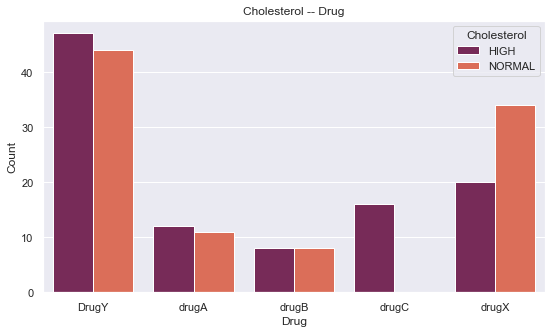

In [22]:
plt.figure(figsize = (9,5))
sns.barplot(data = df_Cholesterol_Drug,x = "Drug",y="Count", hue = "Cholesterol",palette='rocket')
plt.title("Cholesterol -- Drug")
plt.show()

##### DrugY, drugA, drugB, drugX is distributed for both high and normal cholesterol. DrugY, drugA and drugB distributed quite evenly for both high and normal cholesterol, although DrugY has higher distribution than both drugA and drugB. 
##### On the other hand, drugX is distributed higher for normal cholesterol than high cholesterol. 
##### And drugC is distributed only for high cholesterol.

### Feature engineering model training and prediction

##### We will use label encoder to label the categorical features into numrical features.

In [23]:
le=LabelEncoder()
df1['Sex']= le.fit_transform(df['Sex'])
df1['BP']= le.fit_transform(df['BP'])
df1['Cholesterol']= le.fit_transform(df['Cholesterol'])
df1['Drug']= le.fit_transform(df['Drug'])
df1['Na_to_K']= le.fit_transform(df['Na_to_K'])

In [24]:
df1.Sex.unique() # 0 = F, 1 = M

array([0, 1])

In [25]:
df1.BP.unique() # 0 = HIGH ,low = 1, NORMAL = 2

array([0, 1, 2])

In [26]:
df1.Cholesterol.unique() # 0 = HIGH , NORMAL = 1

array([0, 1])

In [27]:
df1.Drug.unique()  # 0 = DrugY, 1 = drugA, 2 = drugB, 3 = drugC, 4 = drugX

array([0, 3, 4, 1, 2])

In [28]:
df1.Drug.unique()  # 0 = DrugY, 1 = drugA, 2 = drugB, 3 = drugC, 4 = drugX

array([0, 3, 4, 1, 2])

In [29]:
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0
...,...,...,...,...,...,...
195,56,0,1,0,69,3
196,16,1,1,0,75,3
197,52,1,2,0,36,4
198,23,1,2,1,102,4


##### X is the features and y is the target 

In [30]:
X = df1.drop("Drug", axis=1)
y = df1.Drug

In [31]:
X = X.to_numpy()

In [32]:
y = y.to_numpy()

##### Splitting train and test data based on 70 percent train set and 30 percent test set.

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
X_train.shape , X_test.shape

((140, 5), (60, 5))

##### Now we use random forest classifier in order to classify our target. We are also using One-vs-the-rest strategy as this is a multiclass classification problem.

In [35]:
rf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=50, max_features=4, random_state=42))
rf.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_features=4,
                                                     n_estimators=50, n_jobs=-1,
                                                     random_state=42))

##### In the random forest classifier we have used n_estimators and max_features as hyperparameters. max_features is the maxium number of features random forest take to split a node and n_estimators is number of trees.

In [36]:
# prediction
predict = rf.predict(X_test)

In [37]:
# result report
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6
           4       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



##### Classification report shows precision, recall and f1-score. To understand the accuracy properly these evalution matrics are vital. Precision tells us how many of the correctly predicted cases actually turned out to be positive and recall tells us how many of the actual positive cases we are able to predict correctly with our model. F1 score requires where both precision and recall are significant in order to classify a model.
##### From the above report we can see that precision is  99 and 98 percent based on macro avg and weighted avg, recall is 97 and 98 percent based on macro avg and weighted avg and f1-score is 98 percent. So the overall accuracy can be said as 98 percent.

#### Understanding how well the prediction works.

In [38]:
X_test[3:4, 0:5]

array([[59,  0,  1,  0, 49]], dtype=int64)

In [39]:
rf.predict(X_test[3:4, 0:5]) 

array([3])

##### The above prediction show 3 which is drugC

In [40]:
y_test[3:4]

array([3])

In [41]:
dump(rf, 'G:/Data science Course/Assignments/model_version_assignment/model_version_asnmngt/models/model_v1.joblib')

['G:/Data science Course/Assignments/model_version_assignment/model_version_asnmngt/models/model_v1.joblib']

In [42]:
clf = load('G:/Data science Course/Assignments/model_version_assignment/model_version_asnmngt/models/model_v1.joblib')
clf.predict(X_test[3:4, 0:5])

array([3])

##### The actual test data also shows drugC in that position

### AUC-ROC Score and Curve

###### As this is a multiclass classification we cannot directly feed the prediction and calculate the roc score. Thus, we need to calculate the probability of prediction which is yhat in here.

In [43]:
yhat = rf.predict_proba(X_test) 

In [44]:
roc_auc_score(y_test,yhat,multi_class = "ovr")

0.9969135802469136

In [45]:
# calculate roc curve for multi-class model
n_class = 5

fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, yhat[:,i], pos_label=i)

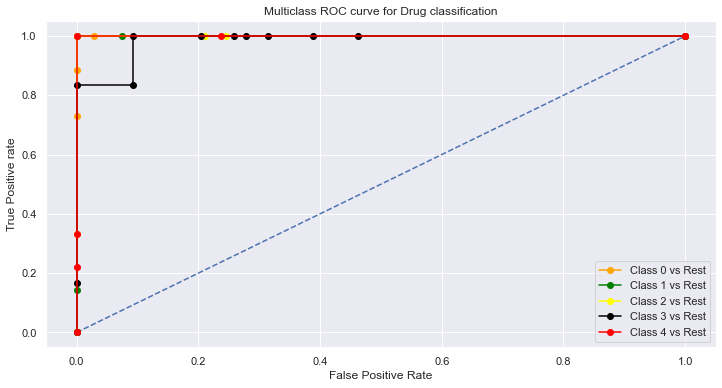

In [46]:
plt.figure(figsize = (12,6))

# plot no skill/RANDOM roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr[0], tpr[0], marker='o',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], marker='o',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], marker='o',color='yellow', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], marker='o',color='black', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], marker='o',color='red', label='Class 4 vs Rest')

plt.title('Multiclass ROC curve for Drug classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

# show the plot
plt.legend(loc='best')


##### We also want to look at Grid search cross validation. Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions and Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

In [47]:
#GridSearchCV
rf2 = OneVsRestClassifier(RandomForestClassifier(random_state=42))

params = {'estimator__n_estimators': [1,200,2],
          'estimator__max_features': [2,3,4,5],
          'estimator__criterion':['gini','entropy'] 
         }

rf_grid = GridSearchCV(rf2, param_grid=params, cv=10, verbose=2,n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__criterion': ['gini', 'entropy'],
                         'estimator__max_features': [2, 3, 4, 5],
                         'estimator__n_estimators': [1, 200, 2]},
             verbose=2)

##### Above the parameters n_estimators,max_features and criterion and we use 10 fold for cross validation.

In [48]:
# print information
print(f'Train Score: {rf_grid.best_score_}')
print(f'Best parameters >>> {rf_grid.best_params_}')

print(f'Test Score: {rf_grid.score(X_test,y_test)}')

Train Score: 0.9928571428571429
Best parameters >>> {'estimator__criterion': 'gini', 'estimator__max_features': 3, 'estimator__n_estimators': 200}
Test Score: 0.9833333333333333


##### We have printed out the train score, test score and the best parameter for grid search cv that helps to determine the best hyperparameters for accurate predictions. Here the best parameters are criterion': 'gini', max_features': 3 and n_estimators': 200.